# Hackathon Notebook

# Importing the CSV into a dataframe and initial investigation of the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import datetime

df = pd.read_csv("data/netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s6232,Movie,Classmates Minus,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# Cleaning the data ready for analysis

In [7]:
#converting date added to date.time

df['date_added'] = pd.to_datetime(df['date_added'])

In [8]:
#extracting month and day from date_added column and putting into individual columns

df['year_added'] = df['date_added'].dt.strftime('%Y')
df['month_added'] = df['date_added'].dt.strftime('%m')

In [9]:
#removing description column as non-useful for analysis

df.drop('description', axis=1, inplace=True)

In [10]:
#handling NaN values (see df.info) for director, cast, country, date_added, rating and duration as "unknown".
#This was selected as missing values in the columns are intrinsic to the entry and cannot be defined by a statistic of the dataset.

df = df.fillna("unknown")

In [11]:
#dropping any duplicate records where all column entries are the same for two or more records

df = df.drop_duplicates()

#checking to see if shape of dataframe changed
df.shape

(8807, 13)

In [12]:
#checking unique values in all columns to check for outliers.
#only really works for columns that have values repeated across records... e.g. 'type'

for col in range(df.shape[1]):
    #excluding some columns that have long cell values for ease of reading
    if (df.columns[col] == 'country') or (df.columns[col] == 'listed_in') or (df.columns[col] == 'cast'):
        pass
    else:
        print(df.columns[col])
        print(df.iloc[:,col].unique())
        print('\n\n')

df['rating'].unique()

show_id
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']



type
['Movie' 'TV Show']



title
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']



director
['Kirsten Johnson' 'unknown' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']



date_added
[Timestamp('2021-09-25 00:00:00') Timestamp('2021-09-24 00:00:00')
 Timestamp('2021-09-23 00:00:00') ... Timestamp('2018-12-06 00:00:00')
 Timestamp('2016-03-09 00:00:00') Timestamp('2020-01-11 00:00:00')]



release_year
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]



rating
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '8

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
#can see that rating has some outlier data '74 min' '84 min' '66 min'. These could have been added incorrectly
#getting the location of those values and checking the row to see if duration is listed as "unknown"

min_74 = df[df['rating'] == '74 min'].index
min_84 = df[df['rating'] == '84 min'].index
min_66 = df[df['rating'] == '66 min'].index

print(df.iloc[min_74,:])
print(df.iloc[min_84,:])
print(df.iloc[min_66,:])

     show_id   type            title    director        cast        country  \
5541   s5542  Movie  Louis C.K. 2017  Louis C.K.  Louis C.K.  United States   

               date_added  release_year  rating duration listed_in year_added  \
5541  2017-04-04 00:00:00          2017  74 min  unknown    Movies       2017   

     month_added  
5541          04  
     show_id   type                  title    director        cast  \
5794   s5795  Movie  Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   

            country           date_added  release_year  rating duration  \
5794  United States  2016-09-16 00:00:00          2010  84 min  unknown   

     listed_in year_added month_added  
5794    Movies       2016          09  
     show_id   type                                 title    director  \
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country           date_added  release_year  rating  \
5813  Louis C.K.  United States  2016-08-15

In [14]:
#changing duration of these entries to their respective values from rating, and setting rating to unknown

test = df.copy()

rating_to_duration = [min_74, min_84, min_66]

def r_to_d(df, index_list):
    """
    inputs a dataframe (df=df) and list of row indexes where the duration value has been mistyped in the rating column.
    puts duration value back into the duration column and sets rating value for that row as "unknown".
    """
    for index in index_list:
        df['duration'][index] = df['rating'][index].item()
        df['rating'][index] = "unknown"
        
    return df

In [15]:
r_to_d(df, rating_to_duration)

<ipython-input-14-b5dceb6dfdc5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][index] = df['rating'][index].item()
/Users/irina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-14-b5dceb6dfdc5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'][index] = "unknown"


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,2021,09
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,09
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,09
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,09
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,11
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019,07
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88 min,"Comedies, Horror Movies",2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88 min,"Children & Family Movies, Comedies",2020,01


# Analysing the data

Aim is to analyse the netflix data to see how CS-Streaming can best optimise their services and compete with Netflix.

Things to look at:
1. Weighting of "types" of entries
2. Country - as multiple countries in one entry will need to split
3. Films added per year / month over past 5 years with complete data
4. Types of films added - as multiple genres listed in one entry will need to split
5. Types of series added - as multiple genres listed in one entry will need to split

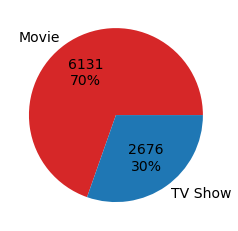

In [16]:
#addressing (1)
#gathering value_counts for "type" in df
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 14}, ylabel='', colors=['tab:red', 'tab:blue'])
plt.savefig('Movies vs TV Shows - Pie Chart');

<ipython-input-17-e4c40e55db5e>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.set_minor_locator(MultipleLocator(250))


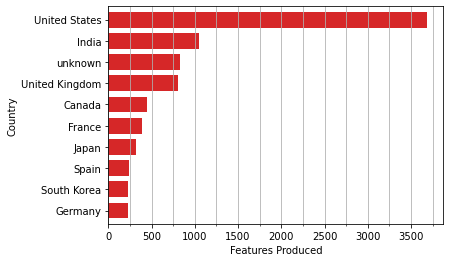

In [17]:
#addressing (2)
#splitting countries in single entry into multiple entries
countries = df.copy()

countries = countries.assign(country=countries['country'].str.split(', ')).explode('country')

#plotting top 10
countries.groupby('country').size().sort_values(ascending=False).head(10).plot.barh(color = 'tab:red', width = 0.75).invert_yaxis()
plt.xlabel('Features Produced')
plt.ylabel('Country')
plt.grid(which='major', axis='x')
plt.grid(which='minor', axis='x')
plt.axes().xaxis.set_minor_locator(MultipleLocator(250))
plt.savefig('No features per country, top 10 - Hbar Chart', bbox_inches='tight');

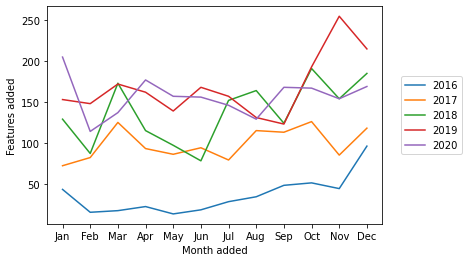

In [18]:
#addressing (3)
past5years = df[df['year_added'].isin(['2020','2019','2018','2017','2016'])]
past5years = past5years.groupby(['month_added', 'year_added'])['show_id'].count()
past5years = past5years.unstack(level=[1])

fig = past5years.plot(xlabel='Month added', ylabel='Features added')
plt.xticks(np.arange(0,12,1))
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
fig.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('Features added per month+year - line plot', bbox_inches='tight');



<ipython-input-19-72c9e8d47632>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.set_minor_locator(MultipleLocator(250))


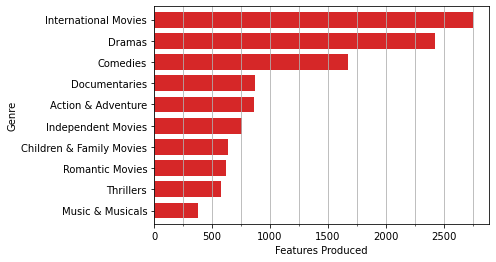

In [19]:
#addressing (4)
#splitting films in single entry into multiple entries

films = df.copy()

films = films[films['type'] == 'Movie']
films = films.assign(listed_in=films['listed_in'].str.split(', ')).explode('listed_in')

#plotting top 10
films.groupby('listed_in').size().sort_values(ascending=False).head(10).plot.barh(color = 'tab:red', width = 0.75).invert_yaxis()
plt.xlabel('Features Produced')
plt.ylabel('Genre')
plt.grid(which='major', axis='x')
plt.grid(which='minor', axis='x')
plt.axes().xaxis.set_minor_locator(MultipleLocator(250))
plt.savefig('No features per film genre, top 10 - Hbar Chart', bbox_inches='tight');

<ipython-input-20-37f77fdc5103>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.set_minor_locator(MultipleLocator(200))


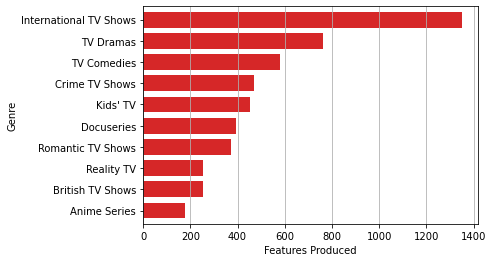

In [20]:
#addressing (5)
#splitting films in single entry into multiple entries

shows = df.copy()

shows = shows[shows['type'] == 'TV Show']
shows = shows.assign(listed_in=shows['listed_in'].str.split(', ')).explode('listed_in')

#plotting top 10
shows.groupby('listed_in').size().sort_values(ascending=False).head(10).plot.barh(color = 'tab:red', width = 0.75).invert_yaxis()
plt.xlabel('Features Produced')
plt.ylabel('Genre')
plt.grid(which='major', axis='x')
plt.grid(which='minor', axis='x')
plt.axes().xaxis.set_minor_locator(MultipleLocator(200))
plt.savefig('No features per TV show genre, top 10 - Hbar Chart', bbox_inches='tight');